In [1]:
#Data analysis packages
import numpy as np
import pandas as pd
#Visualization package
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data into Python environment.
#comcast is the dataframe name.
comcast = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
#Viewing sample of data
comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [5]:
#convert Date_month_year to Datetime
comcast["Date_month_year"] = pd.to_datetime(comcast["Date_month_year"])

In [6]:
#Set Date_month_year to Index to be able to apply grouped function
comcast = comcast.set_index(comcast["Date_month_year"])

In [7]:
#Preview data
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


Text(0.5,1,'Trend chart for the number of complaints at monthly and daily granularity levels')

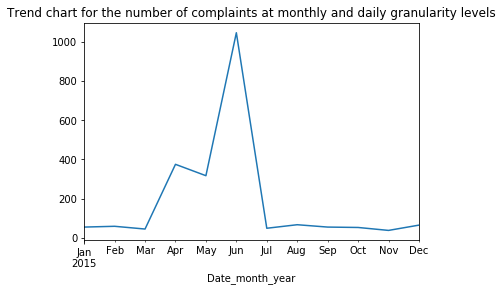

In [8]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
comcast.groupby(pd.Grouper(freq="M")).size().plot()
plt.title("Trend chart for the number of complaints at monthly and daily granularity levels")

In [9]:
#Provide a table with the frequency of complaint types.
comcast['Status'].value_counts().to_frame()

,Status
Solved,973
Closed,734
Open,363
Pending,154


In [10]:
#To check the complaint types/Status of complaint present in the Status column
comcast.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [11]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
#Created a new column with the compliant types/Status of complaint
comcast["Complaint_type"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast["Status"]]

In [12]:
#Preview changes to dataframe
comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Complaint_type
Date_month_year,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed
2015-02-06,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed
2015-09-06,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Closed


In [13]:
#Table with States and Complaint type grouped by states 
Grouped_complaint_types = comcast.groupby(["State","Complaint_type"]).size().unstack().fillna(0)
Grouped_complaint_types

Complaint_type,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


Text(0.5,1,'Stacked bar chart of state wise status of complaints')

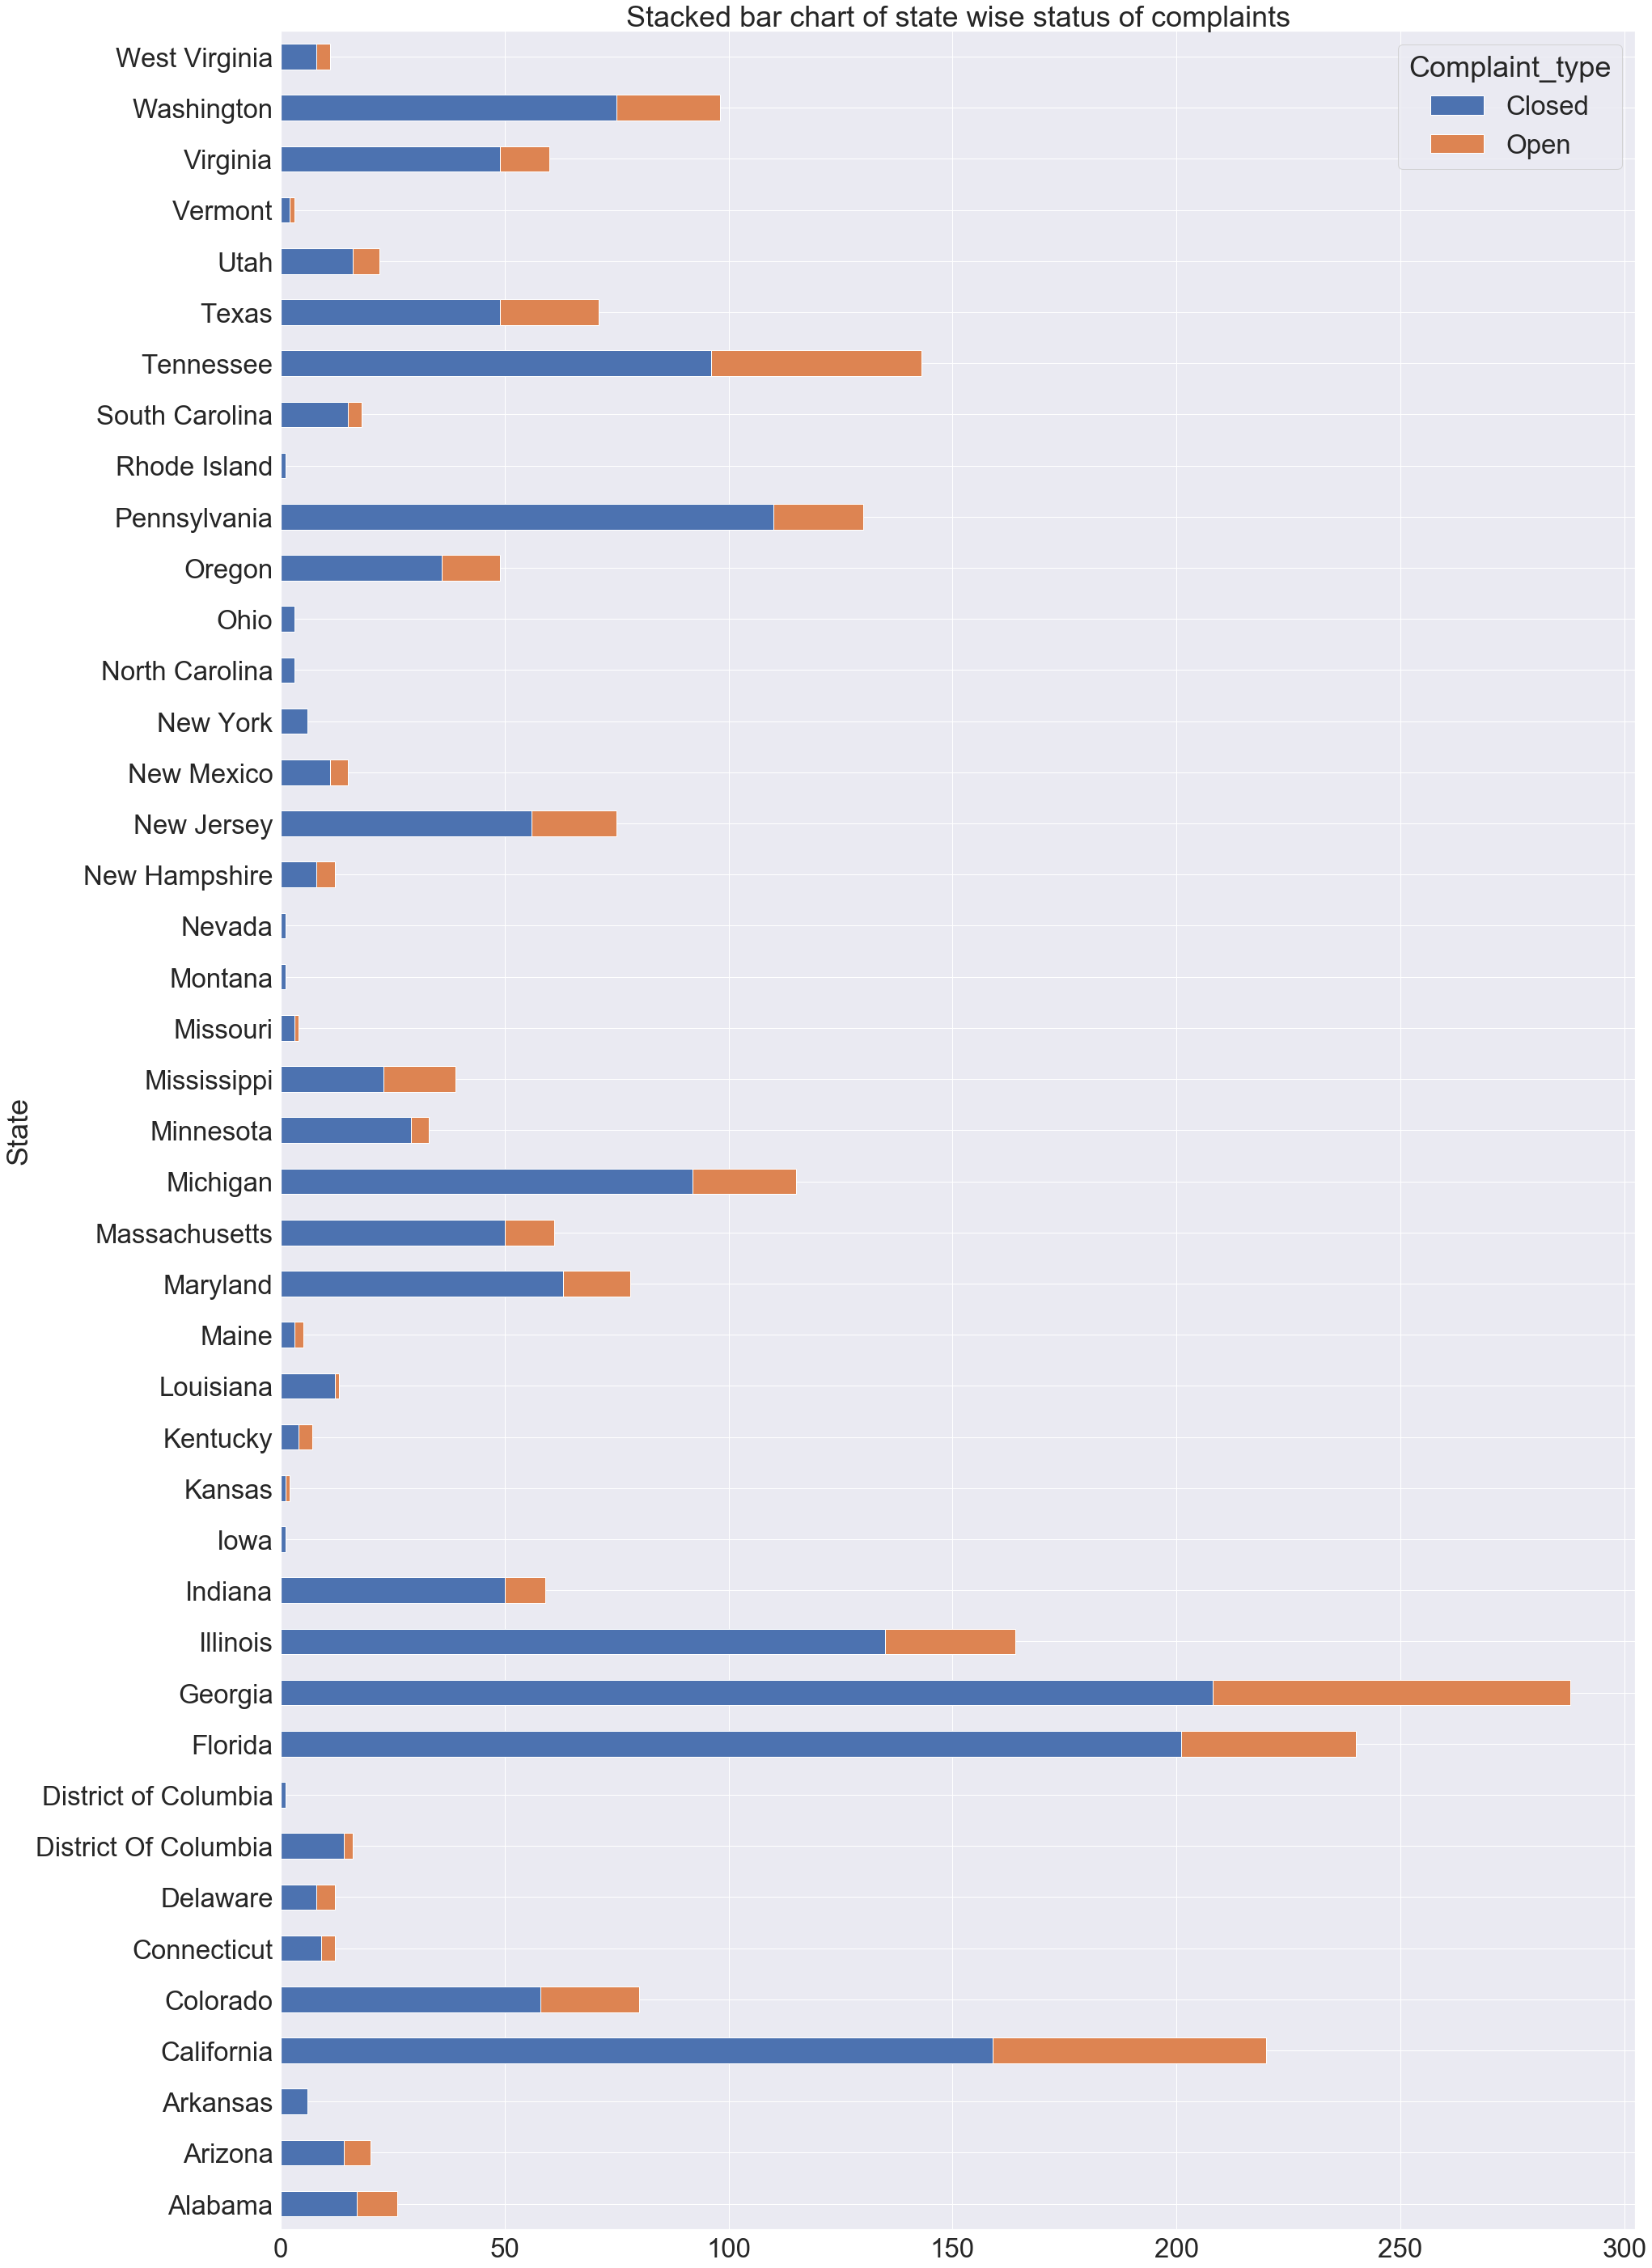

In [14]:
#Provide state wise status of complaints in a stacked bar chart.
sns.set_style("darkgrid")
sns.set(font_scale=3)
Grouped_complaint_types.plot(kind="barh", figsize=(30,50), stacked=True)
plt.title("Stacked bar chart of state wise status of complaints")

In [15]:
#Counting states with complaints
state_count=comcast.State.value_counts()
state_count

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
Delaware                 12
New Hampshire            12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
Ohio                      3
North Carolina      

In [16]:
#Which state has the maximum complaints
state_count.head(1)

Georgia    288
Name: State, dtype: int64

In [17]:
#Which state has the highest percentage of unresolved complaints
#First created and added a percentageOpen column which contains the percentage of unresolved complaints for each state respectively
Grouped_complaint_types['percentageOpen'] = Grouped_complaint_types['Open']/Grouped_complaint_types['Open'].sum()
Grouped_complaint_types

Complaint_type,Closed,Open,percentageOpen
State,,,
Alabama,17.0,9.0,0.017408
Arizona,14.0,6.0,0.011605
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,0.117988
Colorado,58.0,22.0,0.042553
Connecticut,9.0,3.0,0.005803
Delaware,8.0,4.0,0.007737
District Of Columbia,14.0,2.0,0.003868
District of Columbia,1.0,0.0,0.000000


In [18]:
#Extracted the row containing the highest percentage of unresolved complaints
Grouped_complaint_types.loc[Grouped_complaint_types['percentageOpen'].idxmax()]

Complaint_type
Closed            208.000000
Open               80.000000
percentageOpen      0.154739
Name: Georgia, dtype: float64

In [19]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
#grouped data by "Closed" Status and by 'Customer Care Call','Internet'
resolvedgrouped=comcast.loc[(comcast['Received Via'].isin(['Customer Care Call','Internet'])) & (comcast['Status'] == 'Closed')]
resolvedgrouped

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Complaint_type
Date_month_year,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
2015-01-06,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,Closed
2015-04-24,255938,Billing after service was asked to be disconne...,24-04-15,2015-04-24,4:40:36 PM,Internet,Albuquerque,New Mexico,87106,Closed,No,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-04,221763,Comcast,04-07-15,2015-07-04,1:49:52 PM,Internet,Wyoming,Michigan,49509,Closed,No,Closed
2015-06-06,326963,Internet Services,06-06-15,2015-06-06,4:01:16 PM,Internet,Wyoming,Michigan,49509,Closed,No,Closed
2015-04-24,256002,i had sent out a check payment comcast,24-04-15,2015-04-24,5:05:36 PM,Internet,York,Pennsylvania,17401,Closed,No,Closed


In [20]:
#Created a table of resovled complaints
Resolved_complaints = resolvedgrouped.groupby(["Received Via","Complaint_type"]).size().unstack().fillna(0)

In [21]:
#Added a 'percentageResovled' column to verify percentage of complaints resolved till date
Resolved_complaints['percentageResovled'] = Resolved_complaints['Closed']/Resolved_complaints['Closed'].sum()
Resolved_complaints

Complaint_type,Closed,percentageResovled
Received Via,,
Customer Care Call,387,0.527248
Internet,347,0.472752
